In [2]:
# from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [3]:

print("accessing dataset...")
# ((trainX, trainY), (testX, testY)) = mnist.load_data()
# trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
# testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
# trainX = trainX.astype("float32") / 255.0
# testX = testX.astype("float32") / 255.0

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255
x_test = x_test/255
x_train = x_train.reshape((x_train.shape[0], 1*28*28))
x_test_nonreshape = x_test
x_test = x_test.reshape((x_test.shape[0], 1*28*28))

accessing dataset...


In [5]:
model = Sequential()
# model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
# model.add(Dense(128, activation="sigmoid"))
# model.add(Dense(10, activation="softmax"))
model.add(Dense(256, input_shape=(784,), activation='relu'))
#last layer
model.add(Dense(10, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [6]:
# train the model using SGD
print("[INFO] training network...")
# sgd = SGD(0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer='sgd',metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=10)

[INFO] training network...
Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6309 - accuracy: 0.8429
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3301 - accuracy: 0.9077
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2811 - accuracy: 0.9208
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2498 - accuracy: 0.9309
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2266 - accuracy: 0.9372
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2076 - accuracy: 0.9427
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1918 - accuracy: 0.9472
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1786 - accuracy: 0.9504
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1669 - accuracy: 0.9540
Epoch 10/10
1875/1875 [============================

In [7]:
test_loss, accuracy = model.evaluate(x_test, y_test)
print(test_loss)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1540 - accuracy: 0.9559
0.15397456288337708
0.9559000134468079


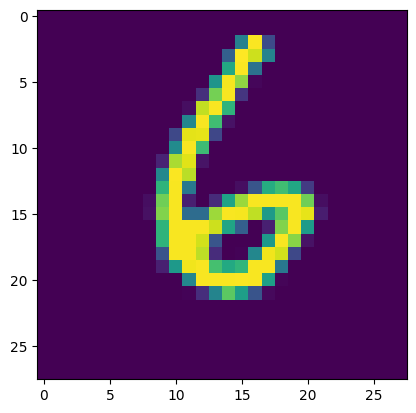

313/313 [==============================] - 1s 3ms/step
Predicted Value is: 6 


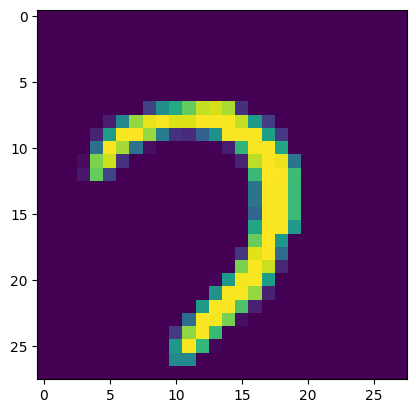

313/313 [==============================] - 1s 3ms/step
Predicted Value is: 7 


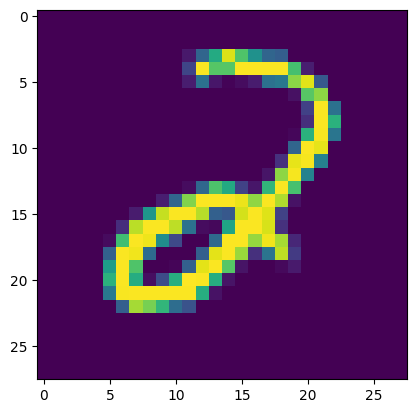

313/313 [==============================] - 1s 3ms/step
Predicted Value is: 2 


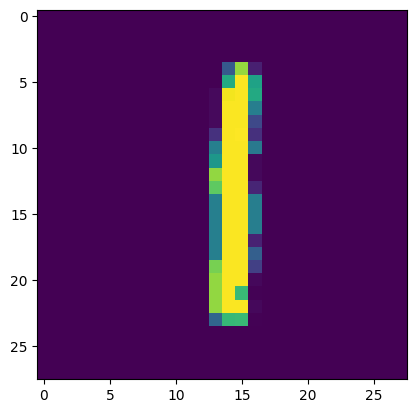

313/313 [==============================] - 1s 3ms/step
Predicted Value is: 1 


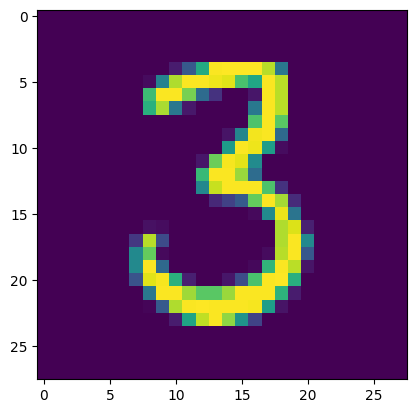

313/313 [==============================] - 1s 4ms/step
Predicted Value is: 3 


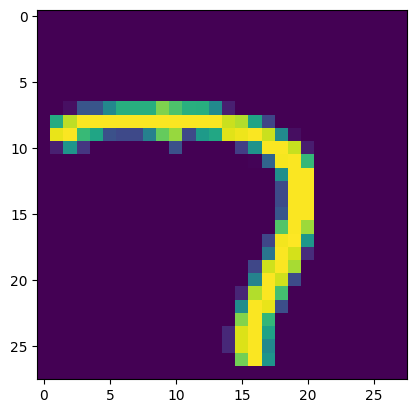

313/313 [==============================] - 1s 3ms/step
Predicted Value is: 7 


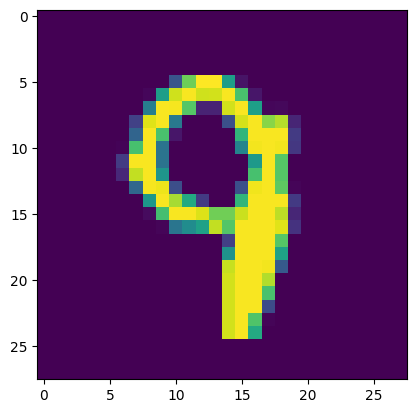

313/313 [==============================] - 1s 3ms/step
Predicted Value is: 9 


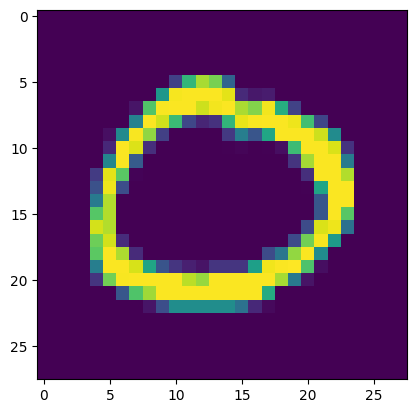

313/313 [==============================] - 1s 3ms/step
Predicted Value is: 0 


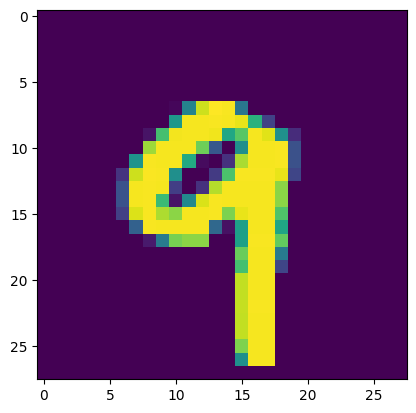

313/313 [==============================] - 1s 3ms/step
Predicted Value is: 9 


In [8]:
import random
for i in range(1, 10):
  n = random.randint(0,1000)
  plt.imshow(x_test_nonreshape[n])
  plt.show()
  predicted_value = model.predict(x_test)
  print(f'Predicted Value is: {np.argmax(predicted_value[n])} ')


In [9]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [10]:
y_pred

array([[8.1117564e-01, 5.9332093e-03, 8.8758415e-01, ..., 9.9996787e-01,
        4.9965915e-01, 9.2911816e-01],
       [9.1360325e-01, 7.0769805e-01, 9.9990755e-01, ..., 1.4780943e-05,
        9.2277133e-01, 4.9928763e-05],
       [1.4435691e-02, 9.9780118e-01, 7.4772131e-01, ..., 6.9550246e-01,
        3.4983471e-01, 1.0722682e-01],
       ...,
       [6.2652403e-03, 2.9489067e-03, 6.7136936e-02, ..., 8.9673984e-01,
        9.7172248e-01, 9.8696202e-01],
       [1.9146848e-01, 5.2103180e-01, 1.1979103e-01, ..., 6.4016860e-03,
        9.6746695e-01, 2.0900944e-02],
       [9.3220139e-01, 9.6150010e-04, 9.7145933e-01, ..., 3.3372361e-04,
        1.9744283e-01, 1.7396118e-02]], dtype=float32)

<AxesSubplot: >

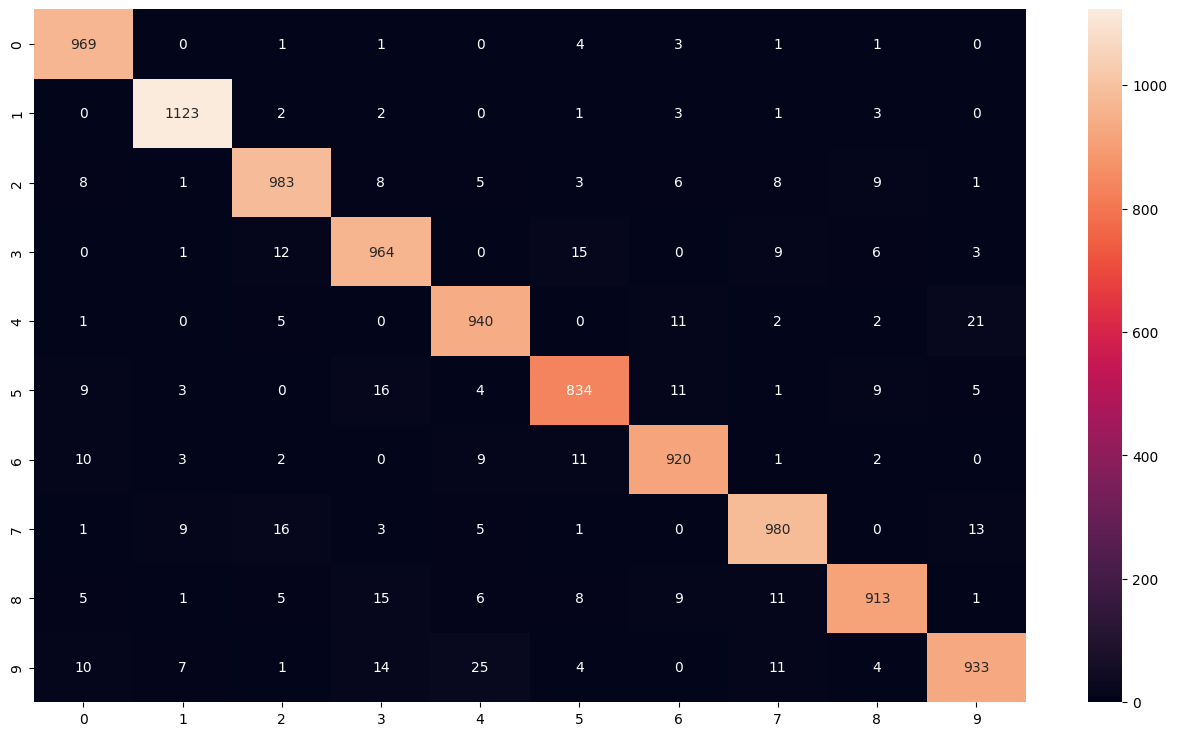

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test , y_pred_labels)

sns.heatmap(cm , annot=True , fmt='d')

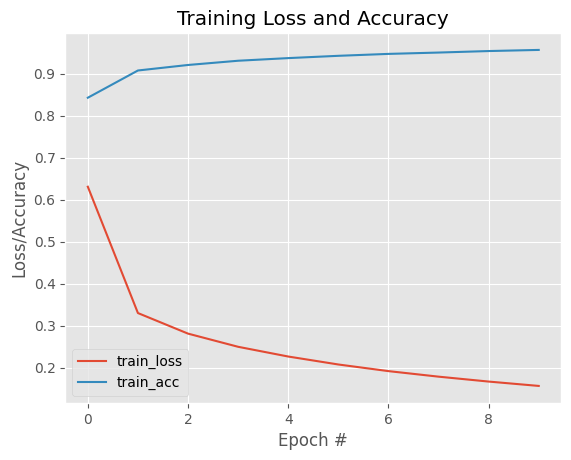

In [12]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), history.history["accuracy"], label="train_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()